In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

This dataset provides detailed information on a wide range of cars, encompassing various makes and models.
It includes key specifications and attributes for each vehicle, such as the car's name, model, price, year of manufacture, fuel type, mileage (kilometers driven), power (engine output) etc..
This rich dataset is designed to support analyses of car values, preferences, and trends in the automotive industry, offering insights into pricing,
 performance, and fuel efficiency across different car types and age groups.

In [2]:
df = pd.read_csv('./data/car_data.csv')
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,6565,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,5850,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,2860,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,10387,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],25350,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [3]:
df.shape

(2059, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [5]:
df.dtypes

Make                   object
Model                  object
Price                   int64
Year                    int64
Kilometer               int64
Fuel Type              object
Transmission           object
Location               object
Color                  object
Owner                  object
Seller Type            object
Engine                 object
Max Power              object
Max Torque             object
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating Capacity      float64
Fuel Tank Capacity    float64
dtype: object

In [6]:
df = df.dropna()
df.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

In [7]:
def replace_RPM(text):
    text = text.split("@")
    text = text[1]
    text = text.replace("rpm", "")
    text = int(text)
    return text

def replace_cc(text):
    text = text.replace("cc", "")
    text = int(text)
    return text

def replace_power(text):
    text = text.split("@")
    text = text[0]
    text = text.replace("bhp", "")
    text = float(text)
    return text

In [8]:
df["Max Torque"] = df["Max Torque"].apply(replace_RPM)
df["Engine"] = df["Engine"].apply(replace_cc)
df["Max Power"] = df["Max Power"].apply(replace_power)
df.insert(0, "Age", df["Year"].max()+1-df["Year"] )
df.drop('Year', axis=1, inplace=True)
df.head()

In [25]:
{x:df[x].duplicated().sum() for x in df}

{'Age': 1856,
 'Make': 1842,
 'Model': 919,
 'Price': 1288,
 'Kilometer': 1084,
 'Fuel Type': 1867,
 'Transmission': 1872,
 'Location': 1799,
 'Color': 1858,
 'Owner': 1870,
 'Seller Type': 1871,
 'Engine': 1770,
 'Max Power': 1718,
 'Max Torque': 1824,
 'Drivetrain': 1871,
 'Length': 1640,
 'Width': 1711,
 'Height': 1685,
 'Seating Capacity': 1868,
 'Fuel Tank Capacity': 1819}

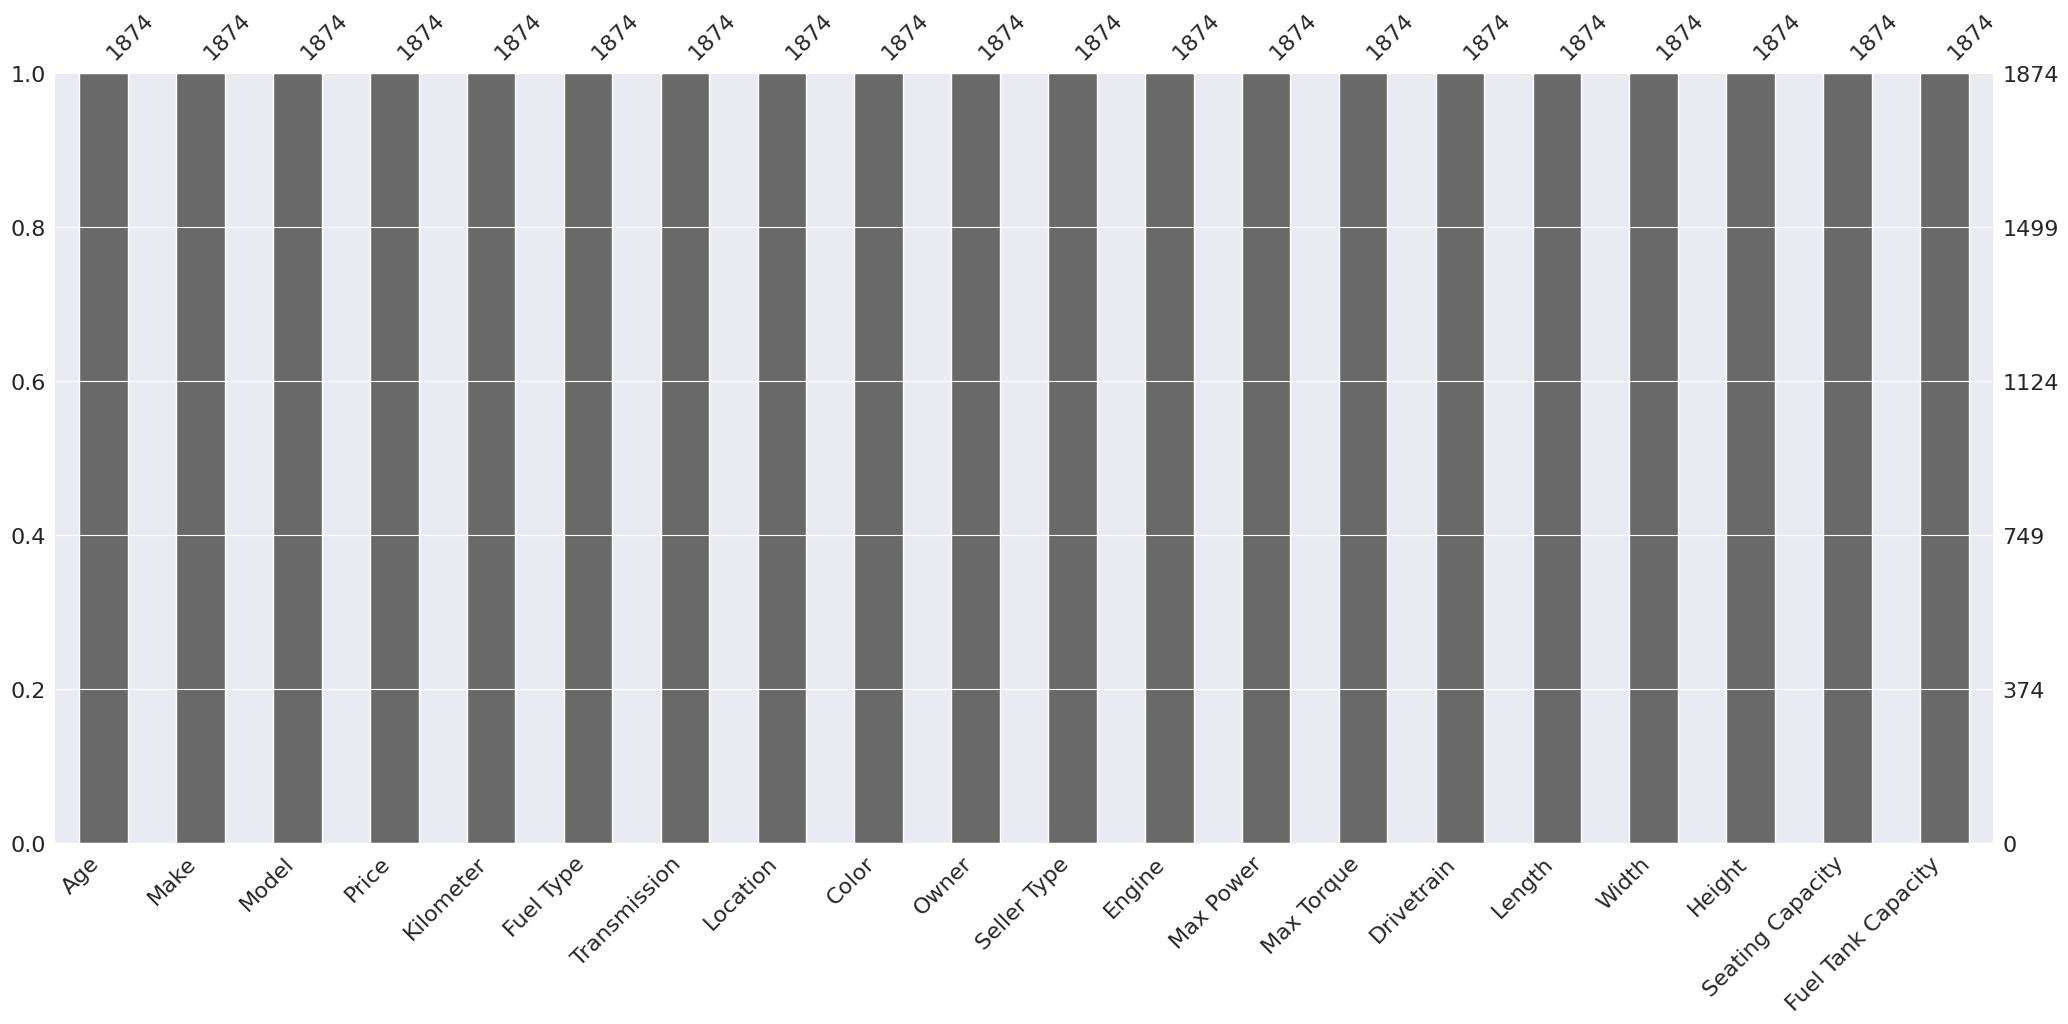

In [26]:
missingno.bar(df)
plt.show()

<Axes: >

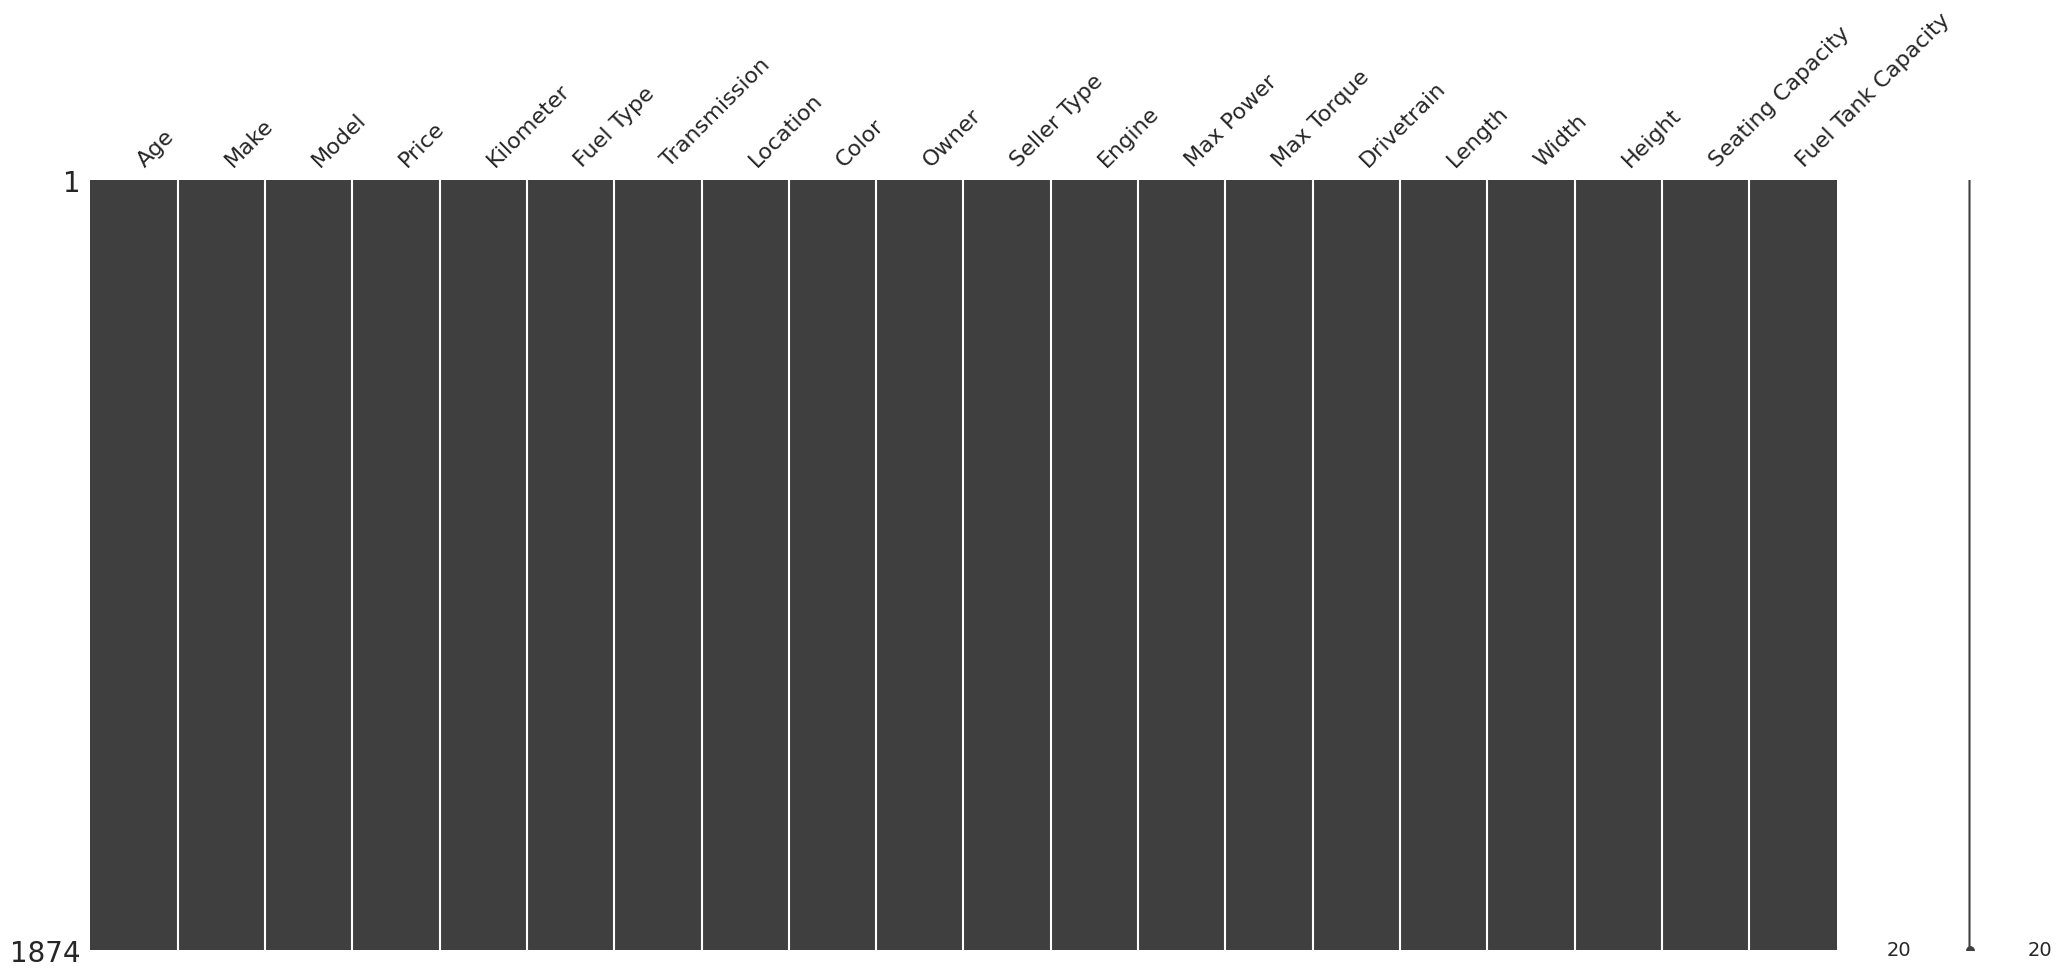

In [27]:
missingno.matrix(df)

In [28]:
new_df = df.drop(['Model','Location','Drivetrain','Seller Type','Owner','Color','Fuel Type','Make','Length','Width','Height','Seating Capacity'], axis=1)
new_df.head()

,Age,Price,Kilometer,Transmission,Engine,Max Power,Max Torque,Fuel Tank Capacity
0,6,6565,87150,Manual,1198,87.0,4500,35.0
1,9,5850,75000,Manual,1248,74.0,2000,42.0
2,12,2860,67000,Manual,1197,79.0,4000,35.0
3,4,10387,37500,Manual,1197,82.0,4200,37.0
4,5,25350,69000,Manual,2393,148.0,1400,55.0


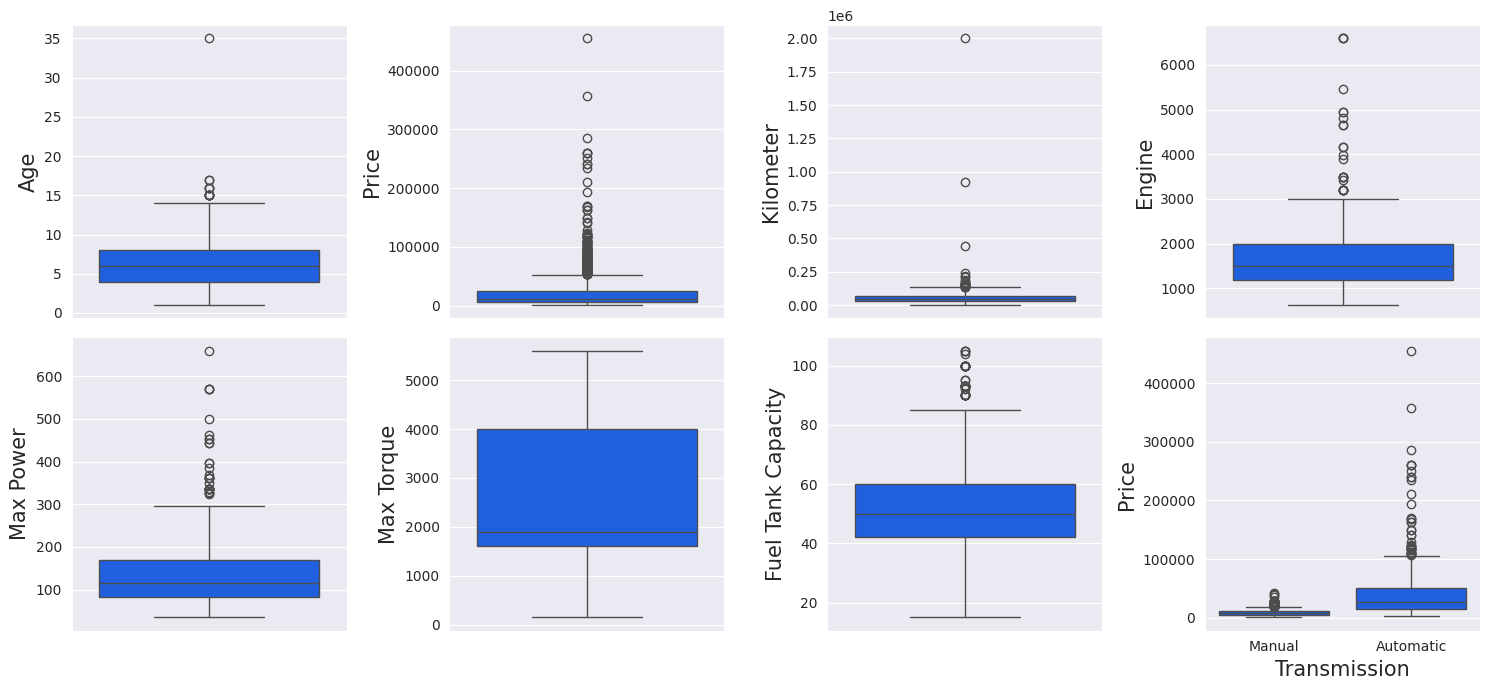

In [29]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

OrderedCols = np.concatenate([new_df.select_dtypes(exclude='object').columns.values,
                              new_df.select_dtypes(include='object').columns.values])

fig, ax = plt.subplots(2, 4, figsize=(15,7),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//4
    y = i%4
    if i < 7:
        sns.boxplot(data=new_df, y=col, ax=ax[x,y])
        ax[x,y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=new_df, x=col, y='Price', ax=ax[x,y])
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Transmission'}, xlabel='Transmission'>

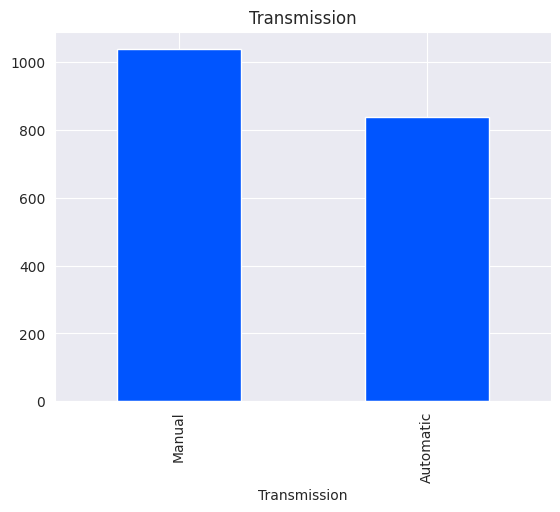

In [30]:
new_df['Transmission'].value_counts().plot(kind='bar',title='Transmission')

In [31]:
NumCols = ['Age', 'Price', 'Kilometer', 'Engine', 'Max Power','Max Torque','Fuel Tank Capacity']


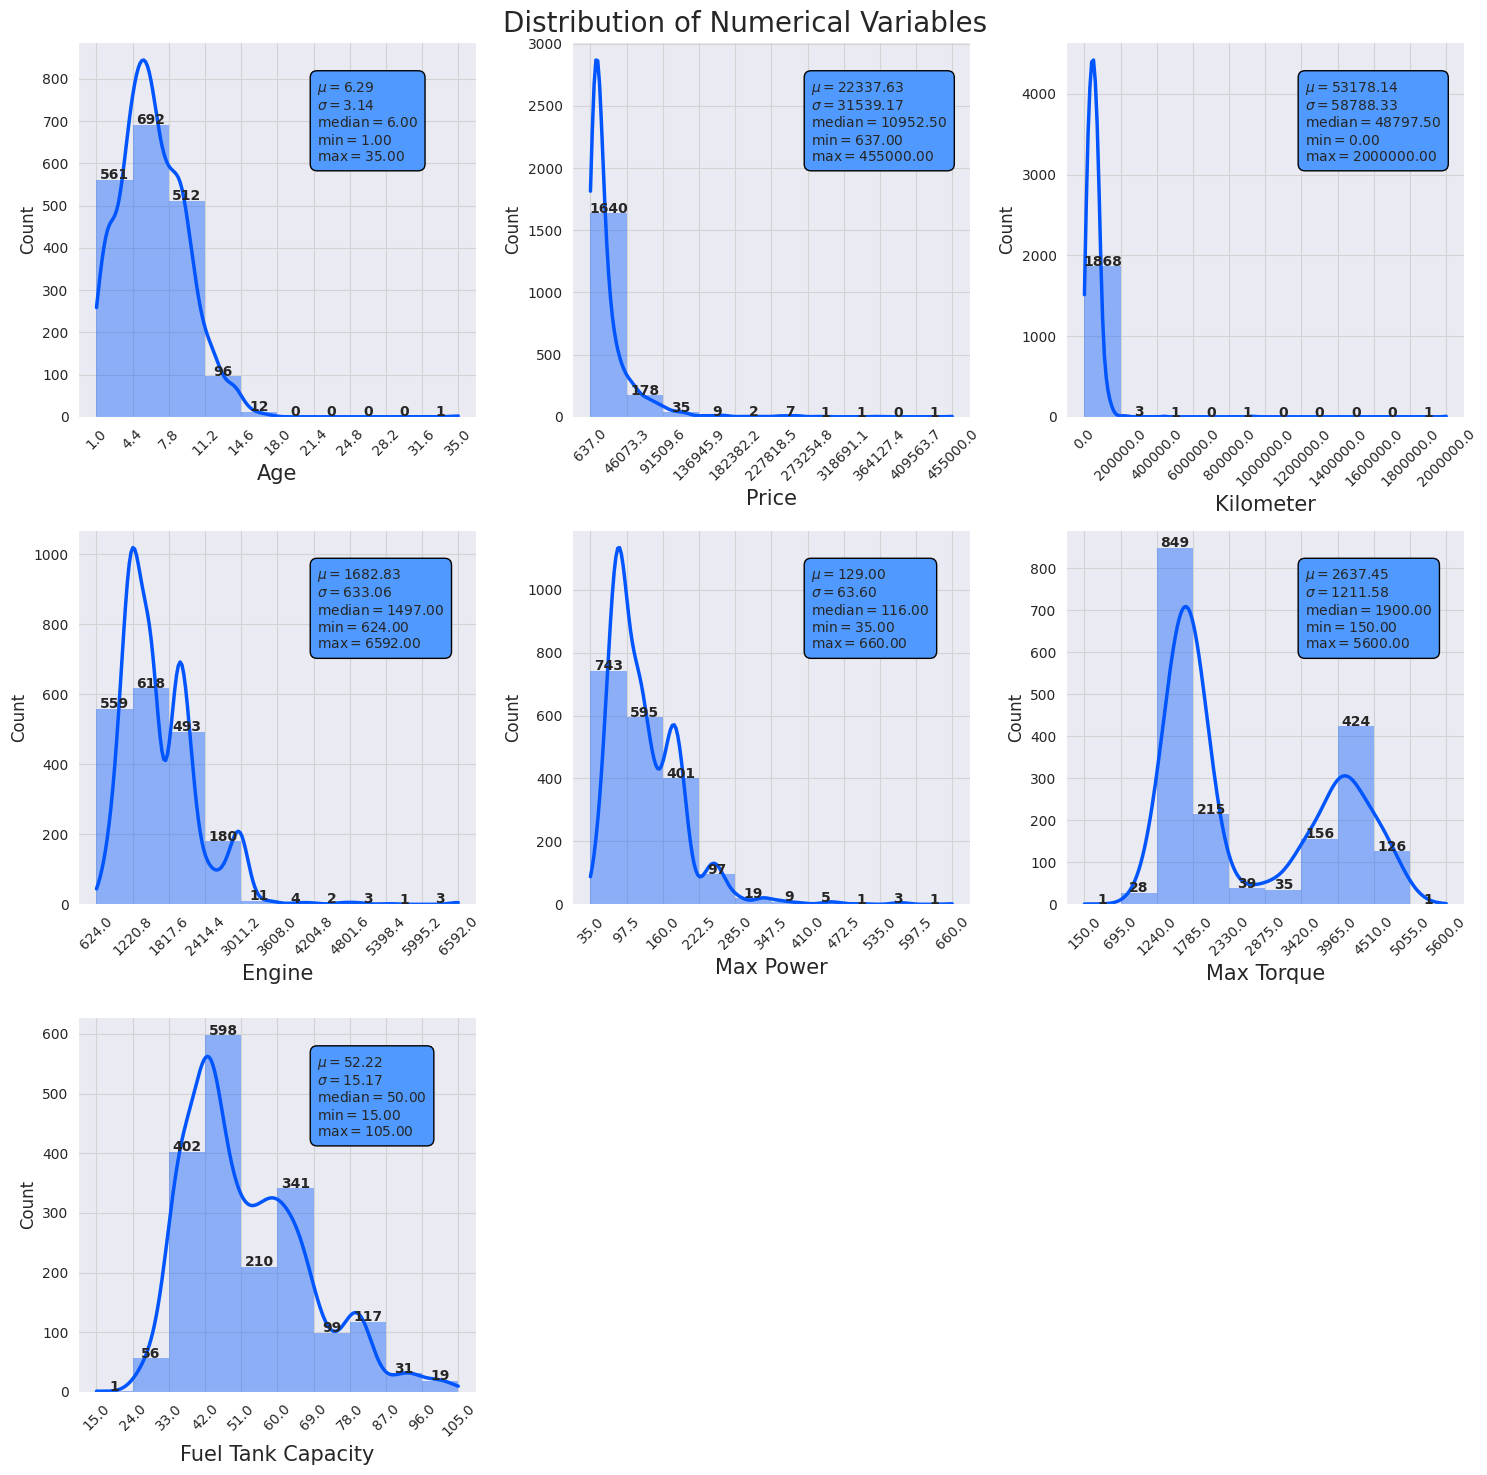

In [32]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15), dpi=100)
c = '#0055ff'

for i in range(len(NumCols)):
    row = i//3
    col = i%3
    values, bin_edges = np.histogram(new_df[NumCols[i]],
                                     range=(np.floor(new_df[NumCols[i]].min()), np.ceil(new_df[NumCols[i]].max())))
    graph = sns.histplot(data=new_df, x=NumCols[i], bins=bin_edges, kde=True, ax=ax[row,col],
                         edgecolor='none', color=c, alpha=0.4, line_kws={'lw': 2.5})
    ax[row,col].set_xlabel(NumCols[i], fontsize=15)
    ax[row,col].set_ylabel('Count', fontsize=12)
    ax[row,col].set_xticks(np.round(bin_edges,1))
    ax[row,col].set_xticklabels(ax[row,col].get_xticks(), rotation = 45)
    ax[row,col].grid(color='lightgrey')
    for j,p in enumerate(graph.patches):
        ax[row,col].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                             ha='center', fontsize=10 ,fontweight="bold")

    textstr = '\n'.join((
    r'$\mu=%.2f$' %new_df[NumCols[i]].mean(),
    r'$\sigma=%.2f$' %new_df[NumCols[i]].std(),
    r'$\mathrm{median}=%.2f$' %np.median(new_df[NumCols[i]]),
    r'$\mathrm{min}=%.2f$' %new_df[NumCols[i]].min(),
    r'$\mathrm{max}=%.2f$' %new_df[NumCols[i]].max()
    ))
    ax[row,col].text(0.6, 0.9, textstr, transform=ax[row,col].transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='#509aff', edgecolor='black', pad=0.5))

ax[2, 1].axis('off')
ax[2, 2].axis('off')
plt.suptitle('Distribution of Numerical Variables', fontsize=20)
plt.tight_layout()
plt.show()

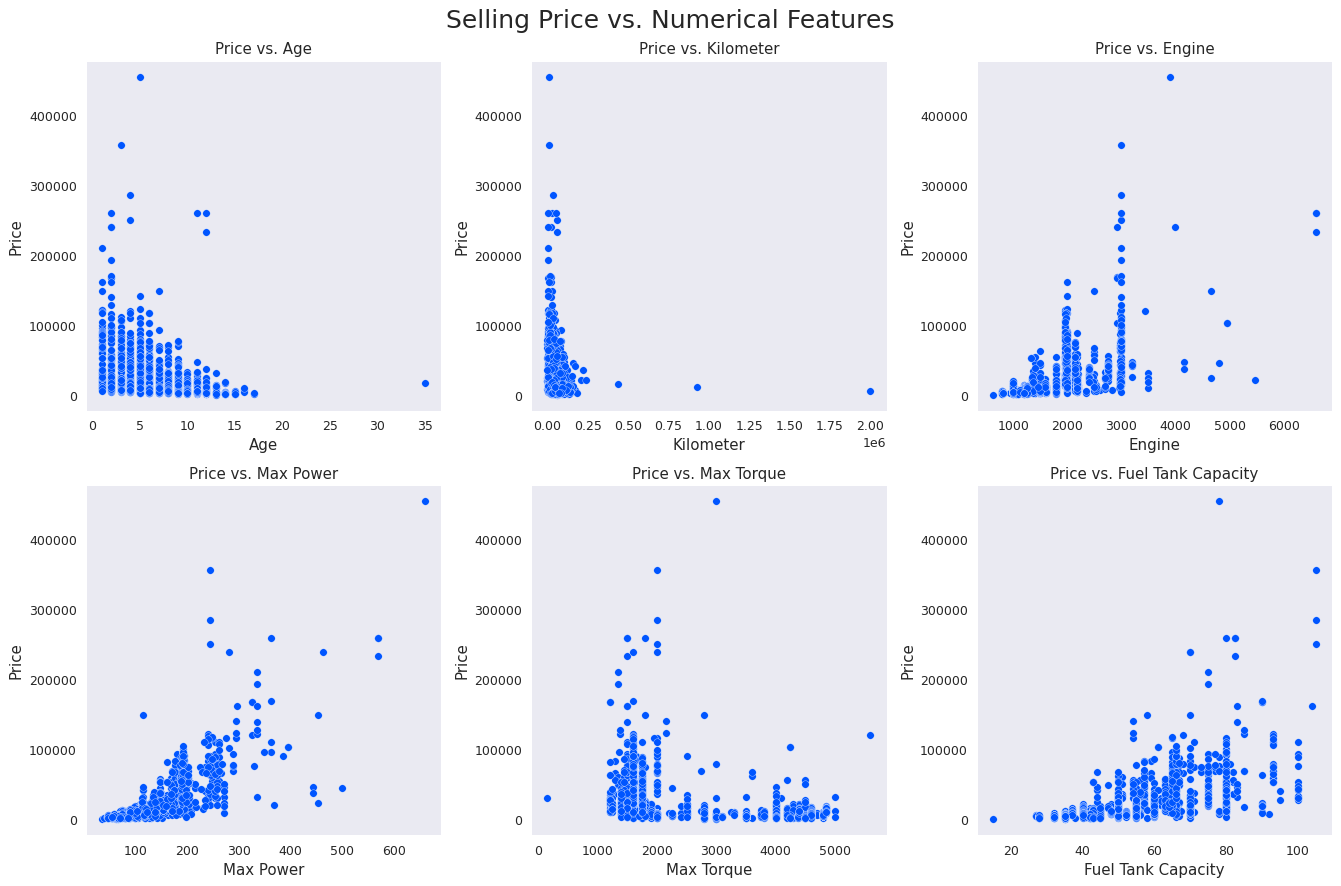

In [33]:
fig, ax = plt.subplots(nrows=2 ,ncols=3, figsize=(15,10), dpi=90)
num_features = ['Age', 'Kilometer', 'Engine', 'Max Power','Max Torque','Fuel Tank Capacity']
target = 'Price'
c = '#0055ff'

for i in range(len(num_features)):
    row = i//3
    col = i%3
    ax[row,col].scatter(new_df[num_features[i]], new_df[target], color=c, edgecolors='w', linewidths=0.25)
    ax[row,col].set_title('{} vs. {}'.format(target, num_features[i]), size = 12)
    ax[row,col].set_xlabel(num_features[i], size = 12)
    ax[row,col].set_ylabel(target, size = 12)
    ax[row,col].grid()

plt.suptitle('Selling Price vs. Numerical Features', size = 20)
plt.tight_layout()
plt.show()

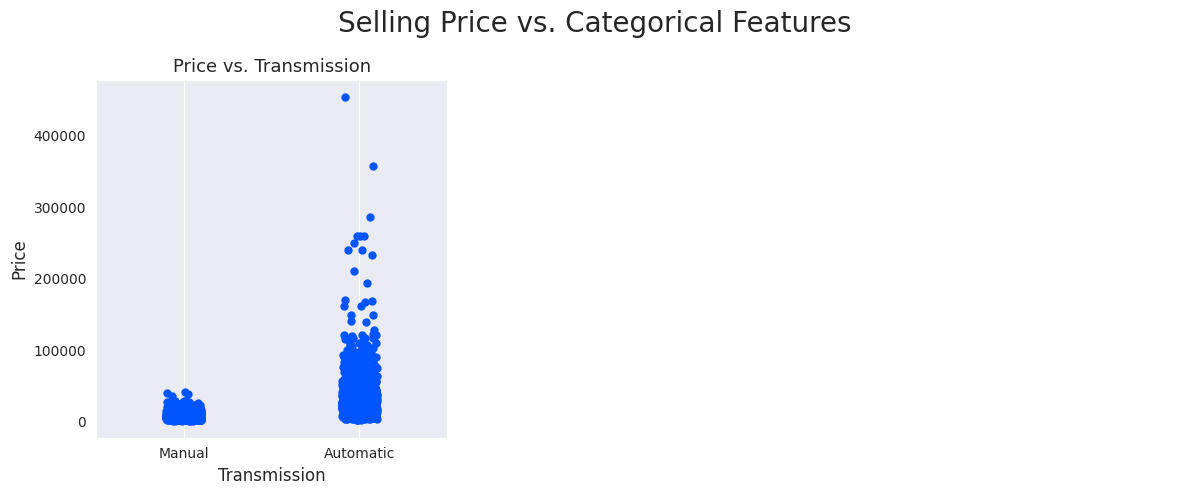

In [34]:
fig, axes = plt.subplots(nrows=1 ,ncols=3, figsize=(12,5), dpi=100)
cat_features = ['Transmission']
target = 'Price'
c = '#0055ff'

for i in range(len(cat_features)):
    sns.stripplot(ax=axes[i], x=cat_features[i], y=target, data=new_df, size=6, color=c)
    axes[i].set_title('{} vs. {}'.format(target, cat_features[i]), size = 13)
    axes[i].set_xlabel(cat_features[i], size = 12)
    axes[i].set_ylabel(target, size = 12)
    axes[i].grid()

axes[1].axis('off')
axes[2].axis('off')
plt.suptitle('Selling Price vs. Categorical Features', size = 20)
plt.tight_layout()
plt.show()

In [36]:
CatCols = ['Transmission']

new_df = pd.get_dummies(new_df, columns=CatCols, drop_first=True)
new_df.head(5)

,Age,Price,Kilometer,Engine,Max Power,Max Torque,Fuel Tank Capacity,Transmission_Manual
0,6,6565,87150,1198,87.0,4500,35.0,True
1,9,5850,75000,1248,74.0,2000,42.0,True
2,12,2860,67000,1197,79.0,4000,35.0,True
3,4,10387,37500,1197,82.0,4200,37.0,True
4,5,25350,69000,2393,148.0,1400,55.0,True


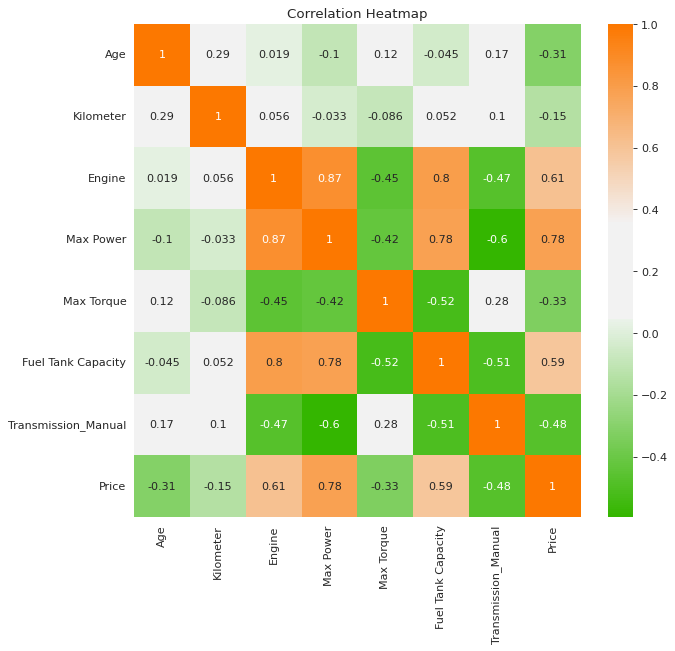

In [37]:
target = 'Price'
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)
fig, ax = plt.subplots(figsize=(9, 8), dpi=80)
ax = sns.heatmap(pd.concat([new_df.drop(target,axis=1), new_df[target]],axis=1).corr(), annot=True, cmap=cmap)
ax.set_title('Correlation Heatmap')
plt.show()

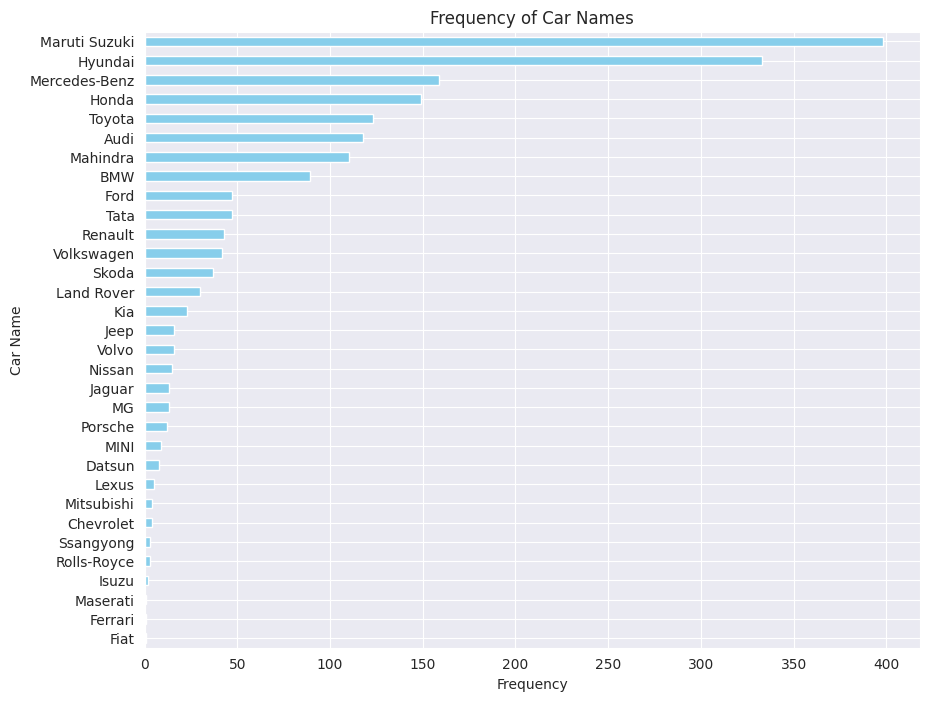

In [75]:
car_name_frequencies = df['Make'].value_counts()

# Plotting
plt.figure(figsize=(10, 8))
car_name_frequencies.plot(kind='barh', color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Car Name')
plt.title('Frequency of Car Names')
plt.gca().invert_yaxis()
plt.show()